# Challenge Objective

- Participants are to develop a machine learning model to predict oil, gas, and water production 
- based on historical records. 
- By analysing past production data and associated parameters, participants should apply the 
- standard machine learning (ML) workflow to accurately forecast production profile of the oil, 
- gas, and water.

## Workflow
- data preparation
- exploratory data analysis
- feature engineering
- data splitting
- modelling and prediction.

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings 
warnings.filterwarnings('ignore')


# Data Preparation


In [21]:
data = pd.read_csv('dseats_2024_training_dataset.csv')

In [22]:
# view first five rows of the dataset
data.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


In [23]:
# check the shape of dataset
data.shape

(6925, 16)

In [24]:
# check columns
data.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

In [25]:
# check data types
data.dtypes

PRODUCTION DATE                   object
Field Name                        object
WELL_BORE_CODE                    object
N_WELL_BORE_CODE                   int64
WellBore Name                     object
FLOW_KIND                         object
WELL_TYPE                         object
Downhole Pressure (PSI)          float64
Downhole Temperature (Kelvin)    float64
Average Tubing Pressure          float64
Annulus Pressure (PSI)           float64
AVG WHP (PSI)                    float64
Choke Size                       float64
Oil Production (stb/day)         float64
Gas Volume (scf/day)             float64
Water Production (stb/day)       float64
dtype: object

- Out of the 16 columns,6 columns are categorical columns and rest are numerical columns.

In [26]:
# categorical columns
cat_col = data.select_dtypes(include='object')
cat_col

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,001-F-1 C,production,OP
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,001-F-1 C,production,OP
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,001-F-1 C,production,OP
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,001-F-1 C,production,OP
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,001-F-1 C,production,OP
...,...,...,...,...,...,...
6920,26/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,001-F-15 D,production,OP
6921,27/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,001-F-15 D,production,OP
6922,28/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,001-F-15 D,production,OP
6923,29/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,001-F-15 D,production,OP


In [27]:
# Check uniqueness of the categorical columns
for col in cat_col:
    print(col)
    print(cat_col[col].unique())
    print("="*50)

PRODUCTION DATE
['07/04/2014 00:00' '08/04/2014 00:00' '09/04/2014 00:00' ...
 '05/07/2013 00:00' '06/07/2013 00:00' '07/07/2013 00:00']
Field Name
['DSEAT']
WELL_BORE_CODE
['DSEAT-001-F-1 C' 'DSEAT-001-F-11 H' 'DSEAT-001-F-12 H'
 'DSEAT-001-F-14 H' 'DSEAT-001-F-15 D']
WellBore Name
['001-F-1 C' '001-F-11' '001-F-12' '001-F-14' '001-F-15 D']
FLOW_KIND
['production']
WELL_TYPE
['OP' 'WI']


In [28]:
# check statistical descriptions of dataset
data.describe()

,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000
mean,107.297040,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310
std,0.980161,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008
min,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,107.000000,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300
50%,107.000000,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200
75%,108.000000,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100
max,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


The above table show the mean, standard deviation, range and quartiles of the data

In [29]:
# Check missing values
data.isna().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

There are 6 missing values in the dataset, and it is found in the 'Choke size' column

In [30]:
# check duplicates
dupl = data.duplicated()
print(dupl.sum())

0


There is no duplicated values in the dataset

In [31]:
# change categorical to numerical
data['WELL_TYPE'] = data['WELL_TYPE'].astype('category').cat.codes

# Extract year, month and day from the Production date
data['PRODUCTION DATE'] = pd.to_datetime(data['PRODUCTION DATE'],format='mixed')
data['year'] = data['PRODUCTION DATE'].dt.year
data['month'] = data['PRODUCTION DATE'].dt.month
data['day'] = data['PRODUCTION DATE'].dt.day

#  Exploratory Data Analysis

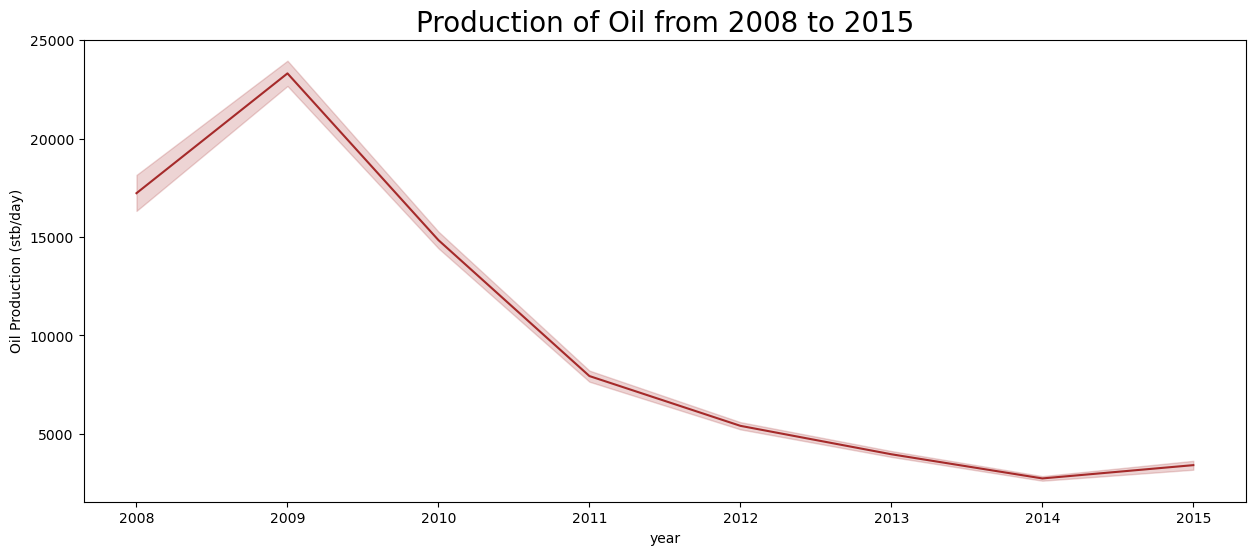

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(x='year',y='Oil Production (stb/day)',data=df2,color='brown')
plt.title('Production of Oil from 2008 to 2015',fontsize=20)
plt.show()

- From the above plot:
    - Production of Oil increased from 2008 to 2009 and started to decline from 2010 to 2014. After some months in 2014, oil produced increased small.

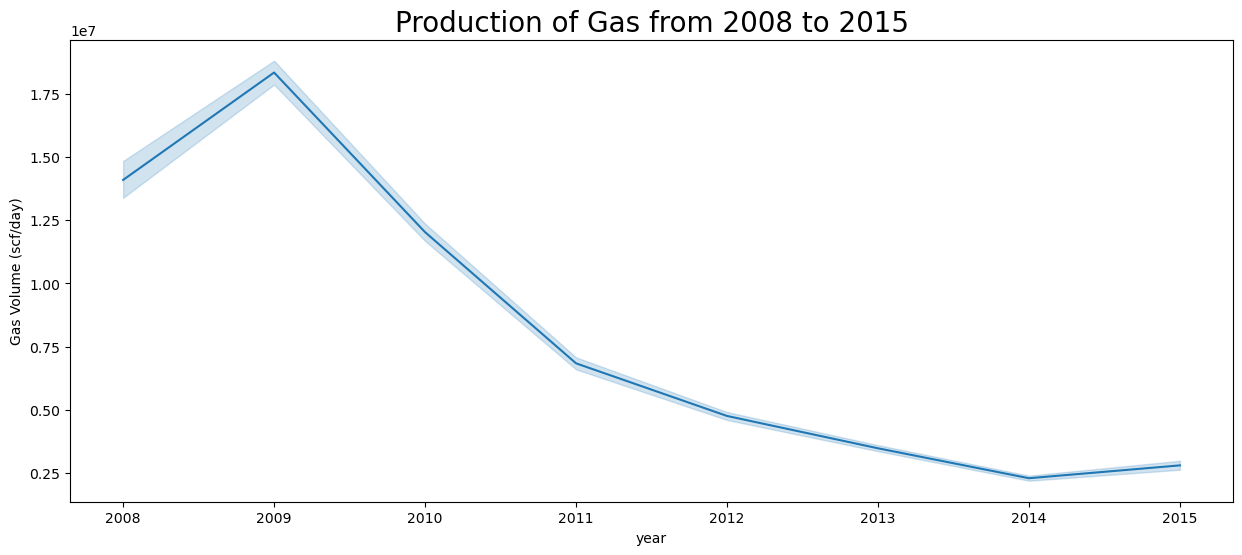

In [33]:
plt.figure(figsize=(15,6))
sns.lineplot(x='year',y='Gas Volume (scf/day)',data=df2)
plt.title('Production of Gas from 2008 to 2015', fontsize=20)
plt.show()

- From the above plot:
    - The production of gas was more than that of oil and water, and gas production was at maximum in 2009 and started to decline when approaching 2010.
    - The least amount of gas produced was in the year 2014.

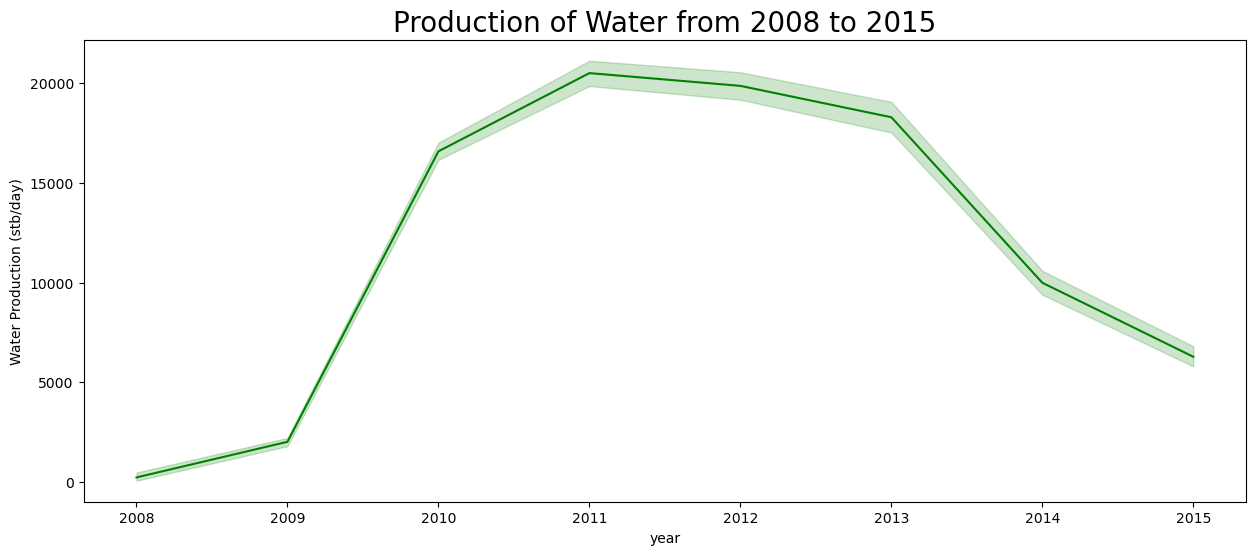

In [34]:
plt.figure(figsize=(15,6))
sns.lineplot(x='year',y='Water Production (stb/day)',data=df2,color='green')
plt.title('Production of Water from 2008 to 2015',fontsize=20)
plt.show()

- From the above plot:
     - In 2008 and 2009 where oil and gas production was maximum, the amount of water produced was small. And as the production of water increases, oil and gas production tend to decline.
     - This means, water production affect oil and gas production.

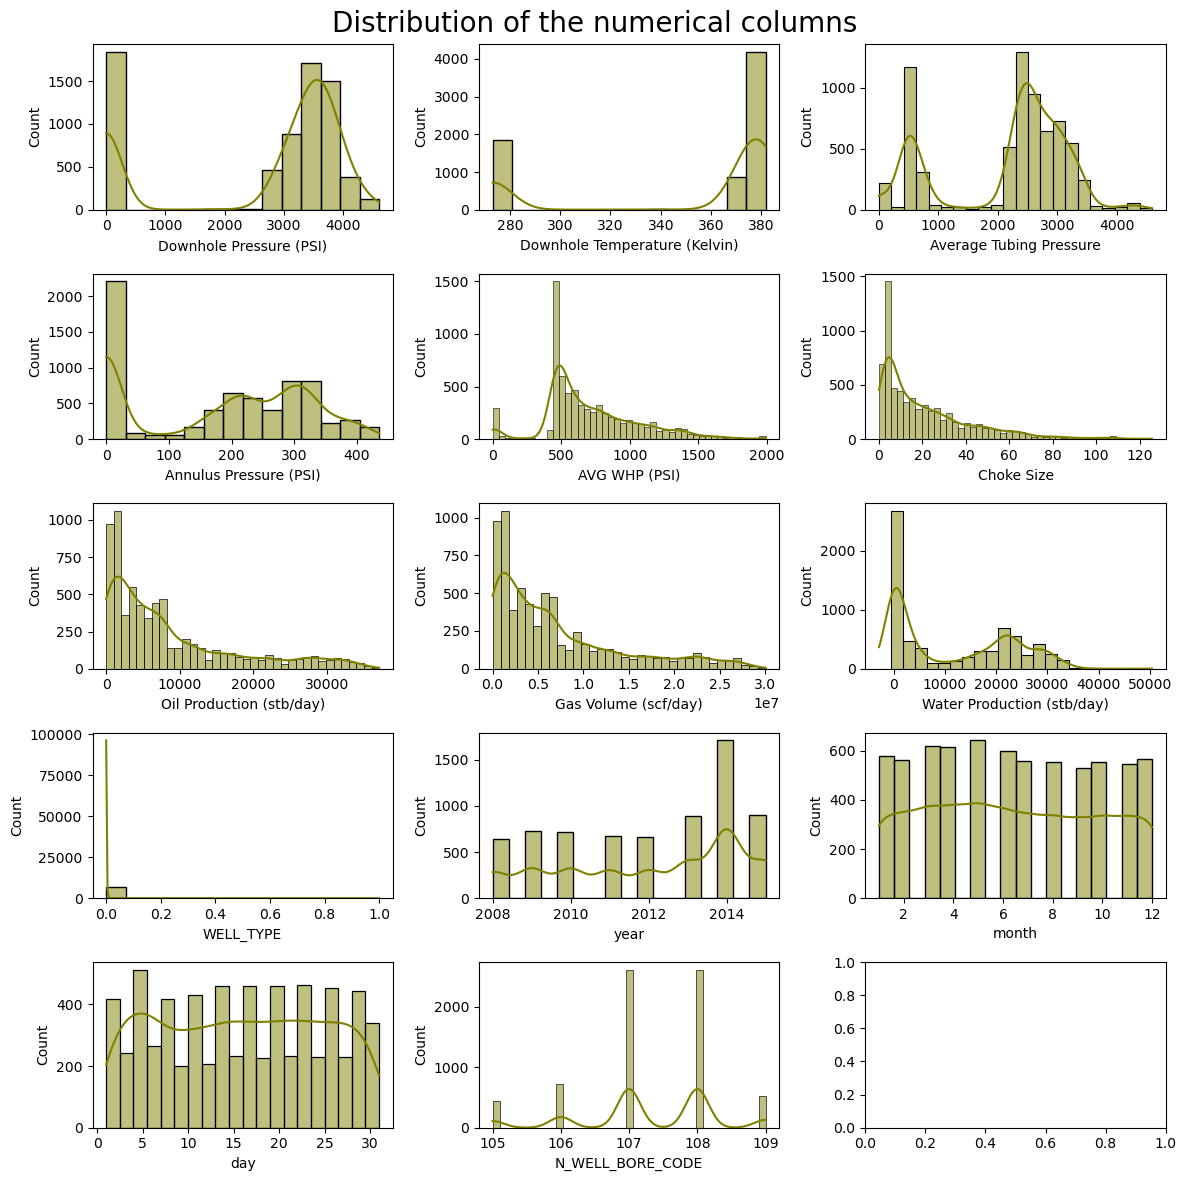

In [36]:
# Distribution of the data in the numerical columns
fig, ax = plt.subplots(5,3, figsize=(12,12))
fig.suptitle("Distribution of the numerical columns",fontsize=20)
sns.histplot(x=data['Downhole Pressure (PSI)'],data=data,kde=True, ax=ax[0,0],color='olive')
sns.histplot(x=data['Downhole Temperature (Kelvin)'],data=data,kde=True, ax=ax[0,1],color='olive')
sns.histplot(x=data['Average Tubing Pressure'],data=data,kde=True, ax=ax[0,2],color='olive')
sns.histplot(x=data['Annulus Pressure (PSI)'],data=data,kde=True, ax=ax[1,0],color='olive')
sns.histplot(x=data['AVG WHP (PSI)'],data=data,kde=True, ax=ax[1,1],color='olive')
sns.histplot(x=data['Choke Size'],data=data,kde=True, ax=ax[1,2],color='olive')
sns.histplot(x=data['Oil Production (stb/day)'],kde=True,data=data, ax=ax[2,0],color='olive')
sns.histplot(x=data['Gas Volume (scf/day)'],data=data,kde=True, ax=ax[2,1],color='olive')
sns.histplot(x=data['Water Production (stb/day)'],data=data,kde=True, ax=ax[2,2],color='olive')
sns.histplot(x=data['WELL_TYPE'],kde=True,data=data, ax=ax[3,0],color='olive')
sns.histplot(x=data['year'],data=data,kde=True, ax=ax[3,1],color='olive')
sns.histplot(x=data['month'],data=data,kde=True, ax=ax[3,2],color='olive')
sns.histplot(x=data['day'],data=data,kde=True, ax=ax[4,0],color='olive')
sns.histplot(x=data['N_WELL_BORE_CODE'],data=data,kde=True, ax=ax[4,1],color='olive')

plt.tight_layout()
plt.show()

- All the columns shown in the above plots are skewed to the right and left. None of them is distributed normally. 

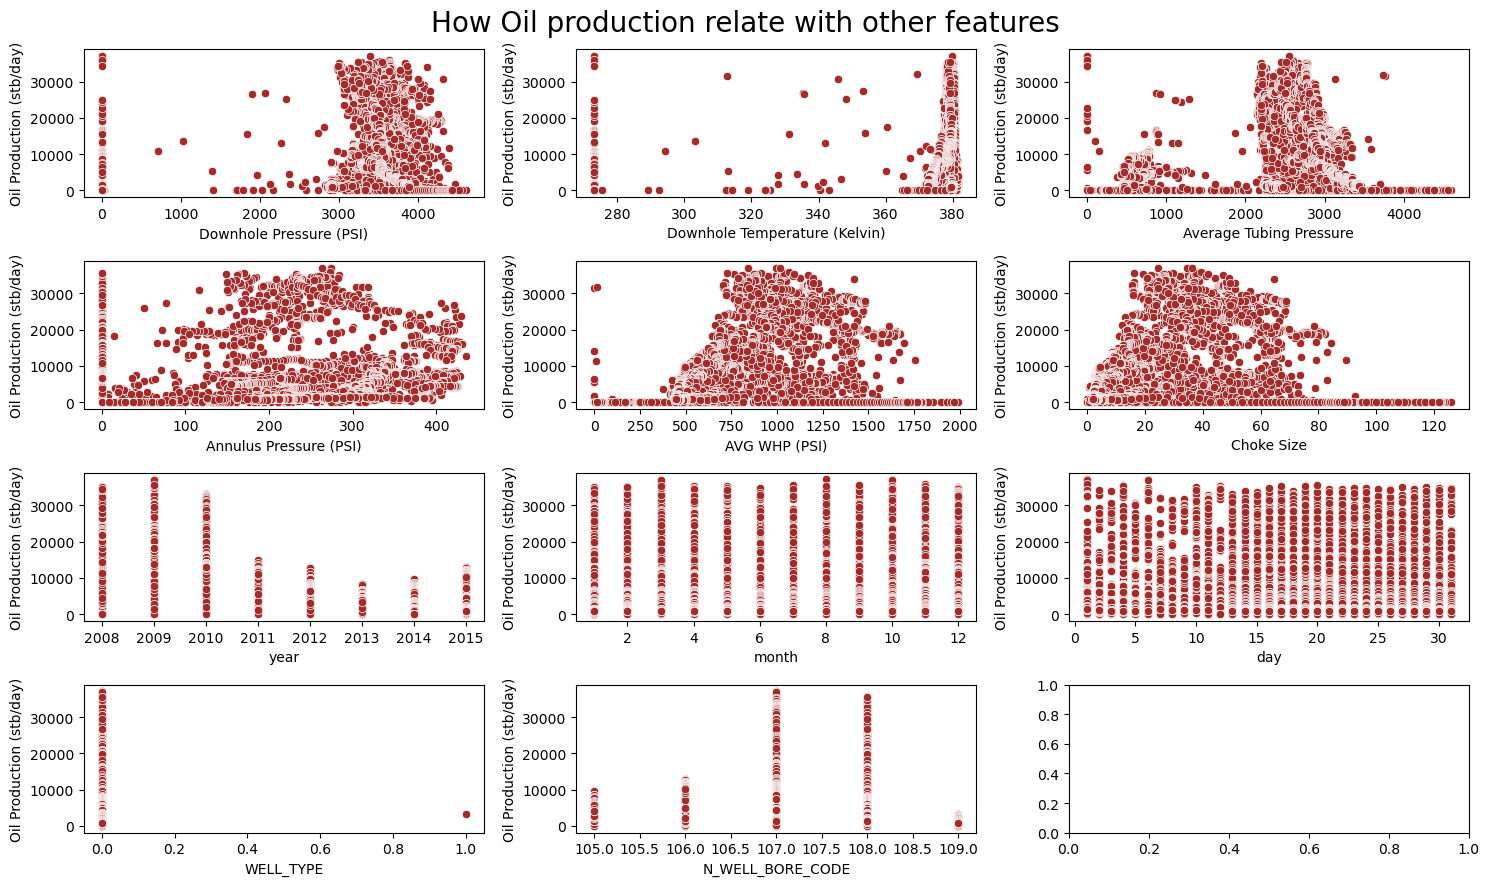

In [37]:
# scatterplot to visualize the oil production relation other features
fig, ax = plt.subplots(4,3, figsize=(15,9))
num_col = data.select_dtypes(exclude=['object','datetime'])
fig.suptitle("How Oil production relate with other features",fontsize=20)
sns.scatterplot(x=data['Downhole Pressure (PSI)'],y=data['Oil Production (stb/day)'],data=data, ax=ax[0,0],color='brown')
sns.scatterplot(x=data['Downhole Temperature (Kelvin)'],y=data['Oil Production (stb/day)'],data=data, ax=ax[0,1],color='brown')
sns.scatterplot(x=data['Average Tubing Pressure'],y=data['Oil Production (stb/day)'],data=data, ax=ax[0,2],color='brown')
sns.scatterplot(x=data['Annulus Pressure (PSI)'],y=data['Oil Production (stb/day)'],data=data, ax=ax[1,0],color='brown')
sns.scatterplot(x=data['AVG WHP (PSI)'],y=data['Oil Production (stb/day)'],data=data, ax=ax[1,1],color='brown')
sns.scatterplot(x=data['Choke Size'],y=data['Oil Production (stb/day)'],data=data, ax=ax[1,2],color='brown')
sns.scatterplot(x=data['year'],y=data['Oil Production (stb/day)'],data=data, ax=ax[2,0],color='brown')
sns.scatterplot(x=data['month'],y=data['Oil Production (stb/day)'],data=data, ax=ax[2,1],color='brown')
sns.scatterplot(x=data['day'],y=data['Oil Production (stb/day)'],data=data, ax=ax[2,2],color='brown')
sns.scatterplot(x=data['WELL_TYPE'],y=data['Oil Production (stb/day)'],data=data, ax=ax[3,0],color='brown')
sns.scatterplot(x=data['N_WELL_BORE_CODE'],y=data['Oil Production (stb/day)'],data=data, ax=ax[3,1],color='brown')
plt.tight_layout()
plt.show()
    

From the above plots (There exist relationship between columns but all that obvious):
- Annulus Pressure (PSI) is inversely proportional to Oil Production (stb/day)
- All the other columns are directly proportional both linear and exponential to Oil Production (stb/day)

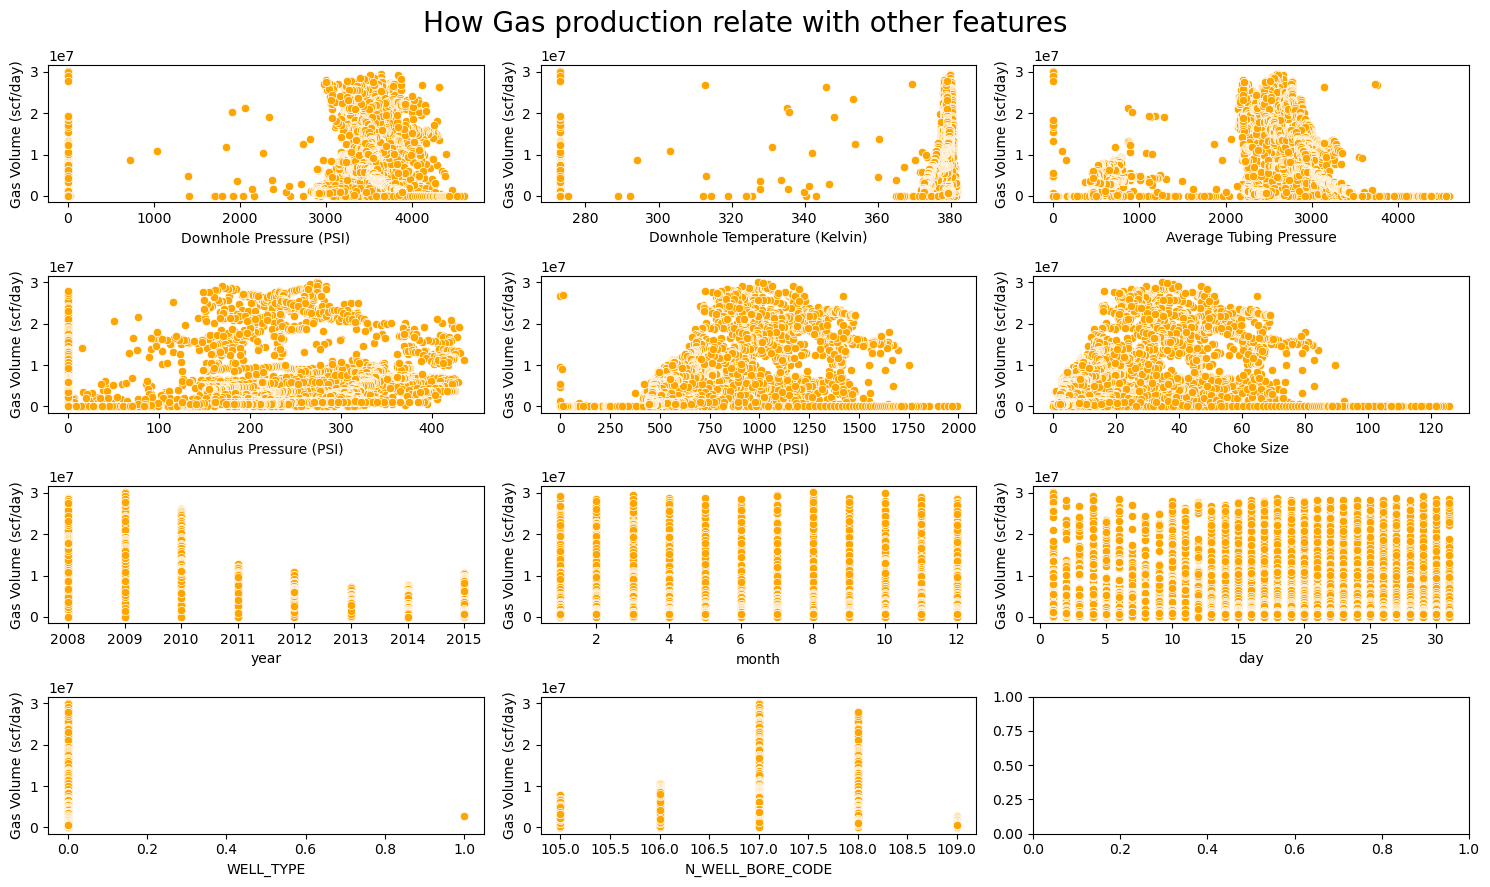

In [38]:
# scatterplot to visualize the gas production relation other features
fig, ax = plt.subplots(4,3, figsize=(15,9))
num_col = data.select_dtypes(exclude=['object','datetime'])
fig.suptitle("How Gas production relate with other features",fontsize=20)
sns.scatterplot(x=data['Downhole Pressure (PSI)'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[0,0],color='orange')
sns.scatterplot(x=data['Downhole Temperature (Kelvin)'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[0,1],color='orange')
sns.scatterplot(x=data['Average Tubing Pressure'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[0,2],color='orange')
sns.scatterplot(x=data['Annulus Pressure (PSI)'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[1,0],color='orange')
sns.scatterplot(x=data['AVG WHP (PSI)'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[1,1],color='orange')
sns.scatterplot(x=data['Choke Size'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[1,2],color='orange')
sns.scatterplot(x=data['year'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[2,0],color='orange')
sns.scatterplot(x=data['month'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[2,1],color='orange')
sns.scatterplot(x=data['day'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[2,2],color='orange')
sns.scatterplot(x=data['WELL_TYPE'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[3,0],color='orange')
sns.scatterplot(x=data['N_WELL_BORE_CODE'],y=data['Gas Volume (scf/day)'],data=data, ax=ax[3,1],color='orange')

plt.tight_layout()
plt.show()
    

From the above plots:
- Annulus Pressure (PSI) is inversely proportional to Gas Volume Production (scf/day)
- All the other columns are directly proportional both linear and exponential to Gas Volume Production (scf/day)

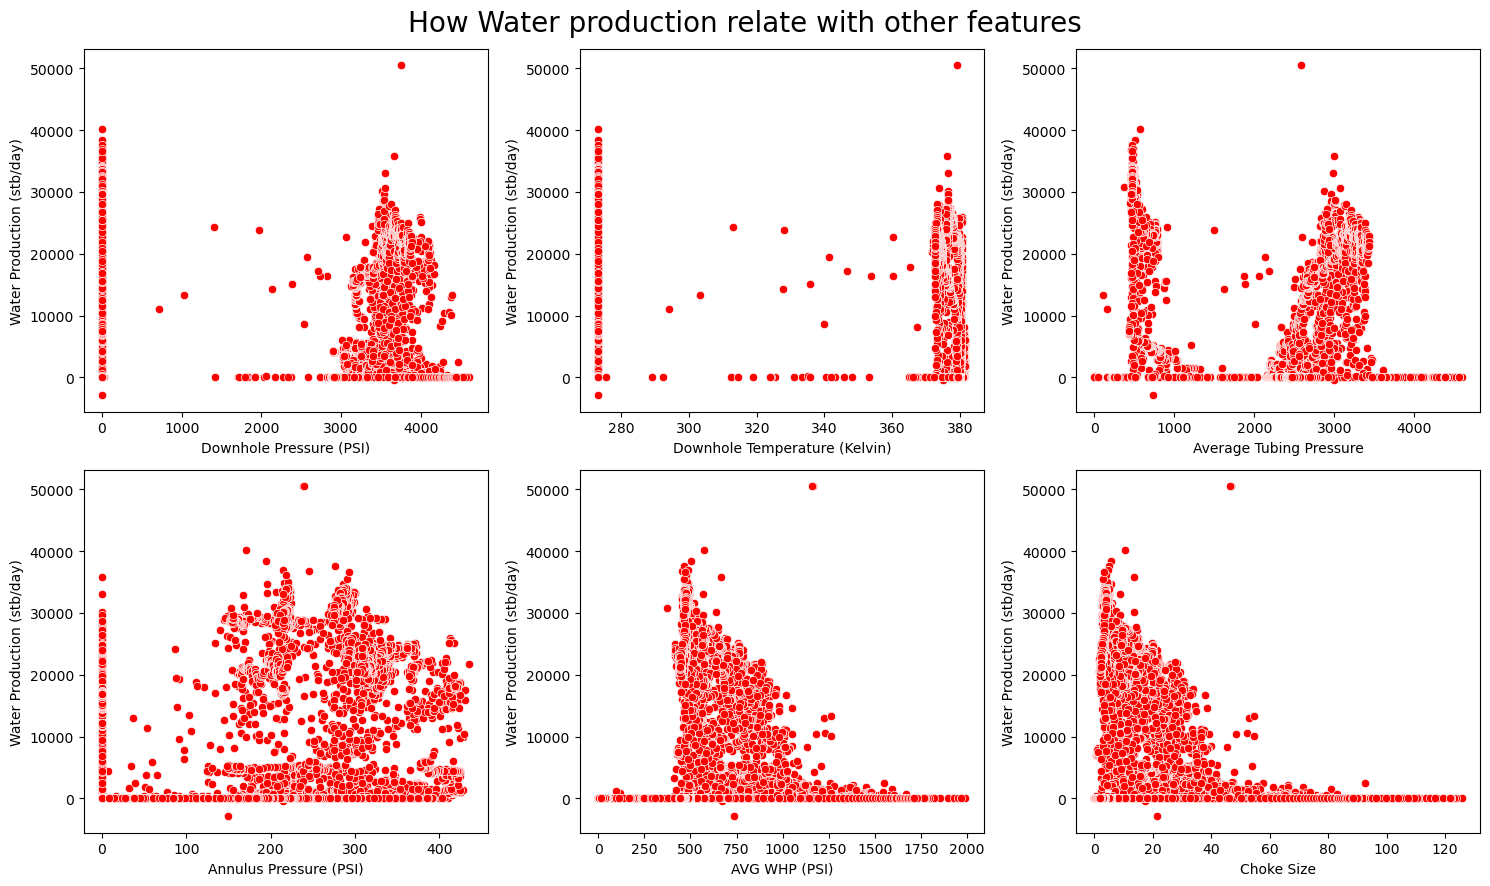

In [33]:
# how water production relate with the other columns
fig, ax = plt.subplots(2,3, figsize=(15,9))
num_col = data.select_dtypes(exclude=['object','datetime'])
fig.suptitle("How Water production relate with other features",fontsize=20)
sns.scatterplot(x=data['Downhole Pressure (PSI)'],y=data['Water Production (stb/day)'],data=data, ax=ax[0,0],color='red')
sns.scatterplot(x=data['Downhole Temperature (Kelvin)'],y=data['Water Production (stb/day)'],data=data, ax=ax[0,1],color='red')
sns.scatterplot(x=data['Average Tubing Pressure'],y=data['Water Production (stb/day)'],data=data, ax=ax[0,2],color='red')
sns.scatterplot(x=data['Annulus Pressure (PSI)'],y=data['Water Production (stb/day)'],data=data, ax=ax[1,0],color='red')
sns.scatterplot(x=data['AVG WHP (PSI)'],y=data['Water Production (stb/day)'],data=data, ax=ax[1,1],color='red')
sns.scatterplot(x=data['Choke Size'],y=data['Water Production (stb/day)'],data=data, ax=ax[1,2],color='red')
plt.tight_layout()
plt.show()
    

From the above plots:
- Only Annulus Pressure (PSI) is showing little direct proportionality to Water Production (stb/day)
- The rest are inversely proportional to water production
- both linearly and exponentially

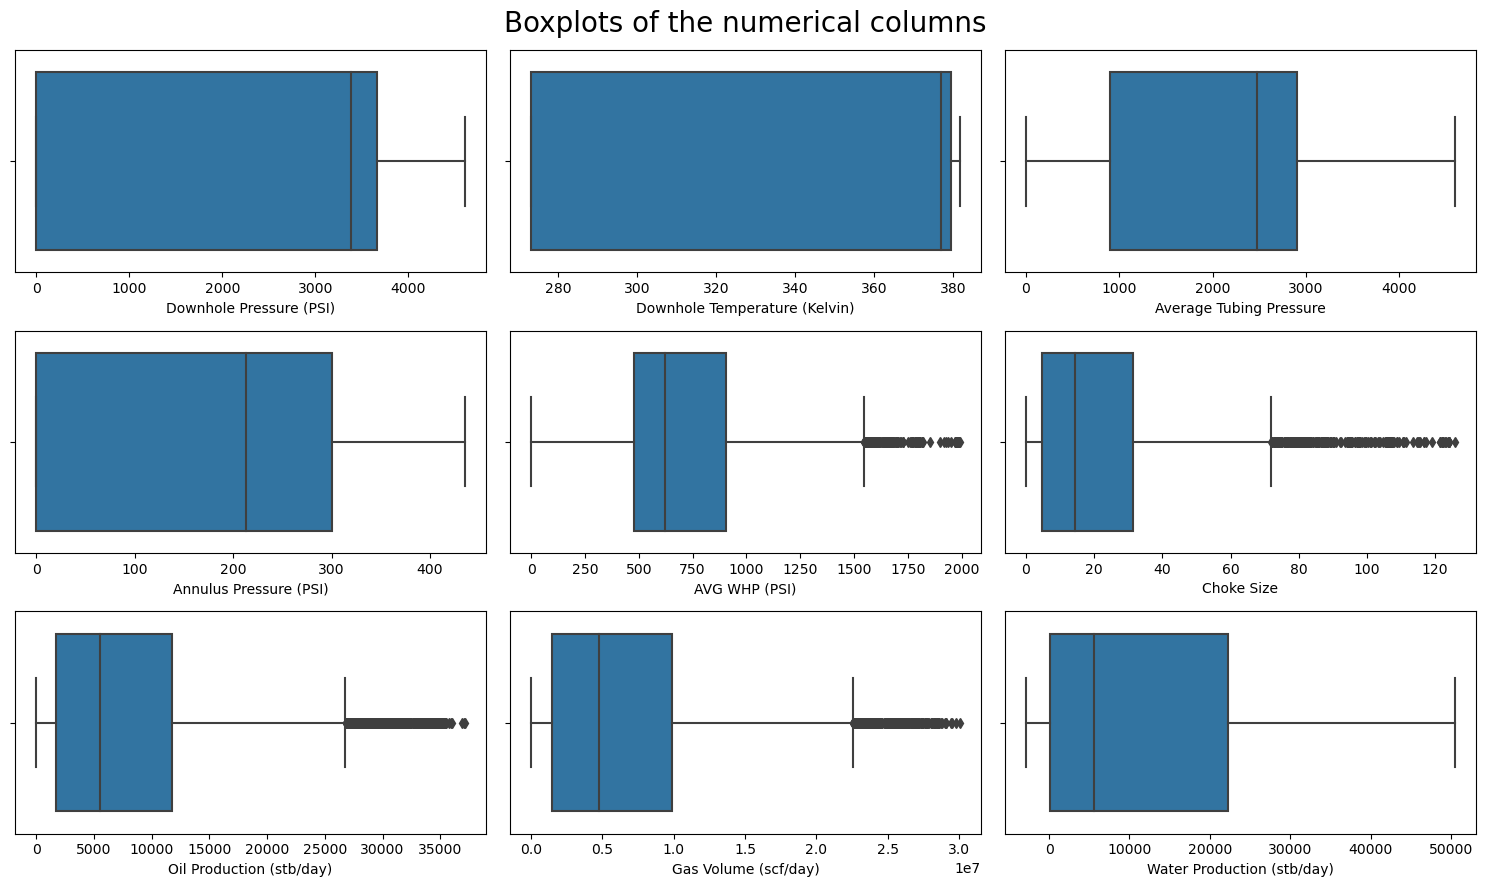

In [24]:
#Boxplot to check outliers
fig, ax = plt.subplots(3,3, figsize=(15,9))
num_col = data.select_dtypes(exclude=['object','datetime'])
fig.suptitle("Boxplots of the numerical columns",fontsize=20)
sns.boxplot(x=data['Downhole Pressure (PSI)'],data=data, ax=ax[0,0])
sns.boxplot(x=data['Downhole Temperature (Kelvin)'],data=data, ax=ax[0,1])
sns.boxplot(x=data['Average Tubing Pressure'],data=data, ax=ax[0,2])
sns.boxplot(x=data['Annulus Pressure (PSI)'],data=data, ax=ax[1,0])
sns.boxplot(x=data['AVG WHP (PSI)'],data=data, ax=ax[1,1])
sns.boxplot(x=data['Choke Size'],data=data, ax=ax[1,2])
sns.boxplot(x=data['Oil Production (stb/day)'],data=data, ax=ax[2,0])
sns.boxplot(x=data['Gas Volume (scf/day)'],data=data, ax=ax[2,1])
sns.boxplot(x=data['Water Production (stb/day)'],data=data, ax=ax[2,2])
plt.tight_layout()
plt.show()

The following columns have outliers:
- AVG WHP (PSI)
- Choke size
- Oil Production (stb/day)
- Gas Volume (scf/day)

#### Visualize the correlation between numerical variables

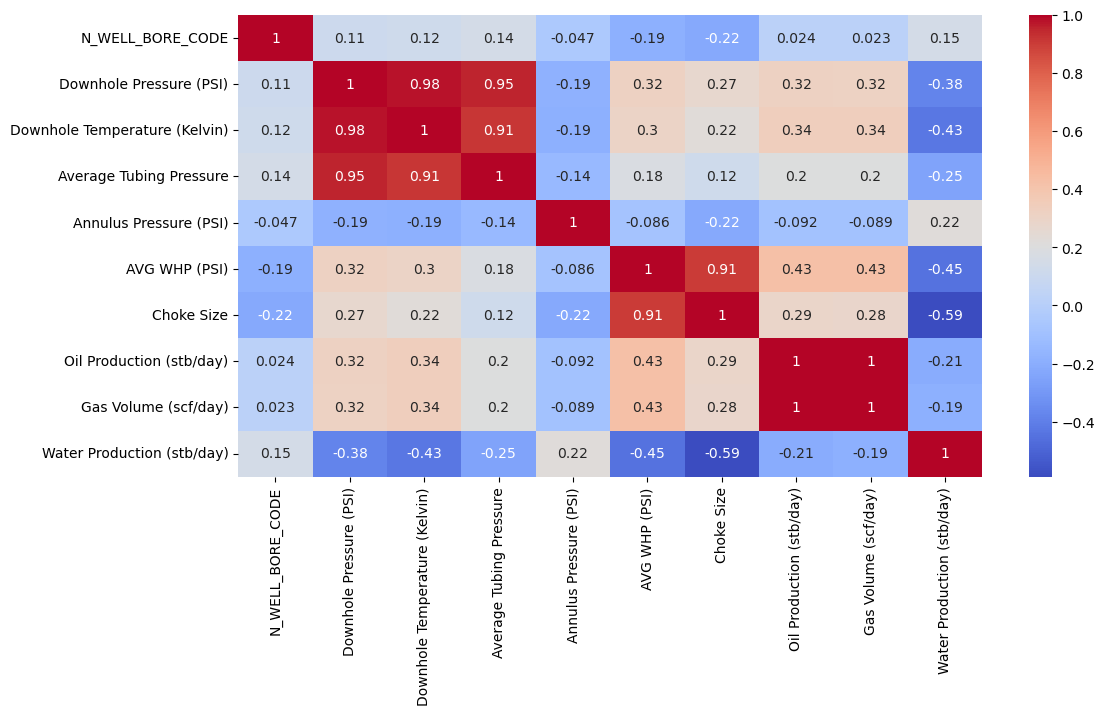

In [22]:
corr = num_col.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

- From the correlation heatmap shown above:
    - All the features correlate negatively with Water production except Annulus Pressure (PSI) which correlate positively with water production.
    - For Oil and Gas Production, only Annulus Pressure and Water production correlate negatively, the rest correlate positively oil and gas production.


#### Let's Visualize the correlation between the target variable and feature variables

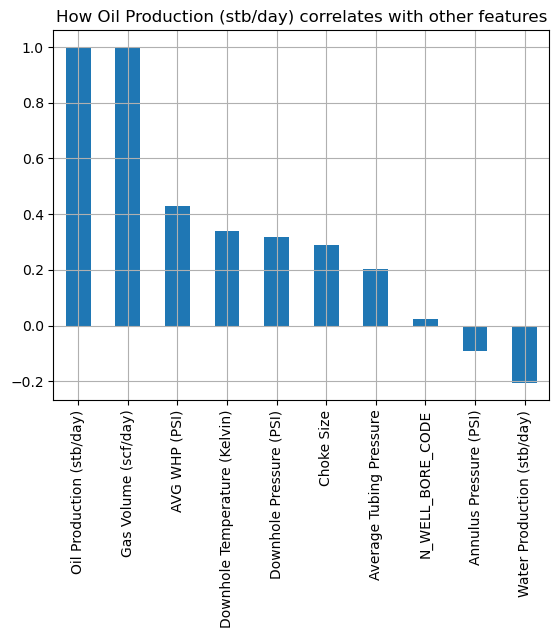

In [23]:
corr['Oil Production (stb/day)'].sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title("How Oil Production (stb/day) correlates with other features")
plt.show()

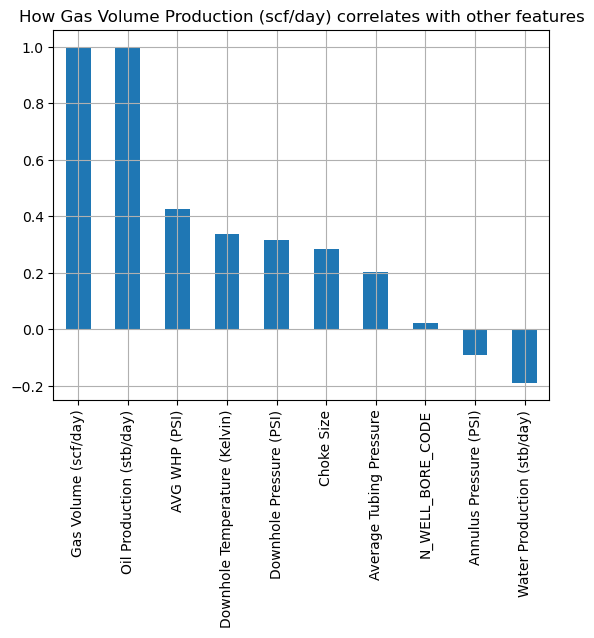

In [24]:
corr['Gas Volume (scf/day)'].sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title("How Gas Volume Production (scf/day) correlates with other features")
plt.show()

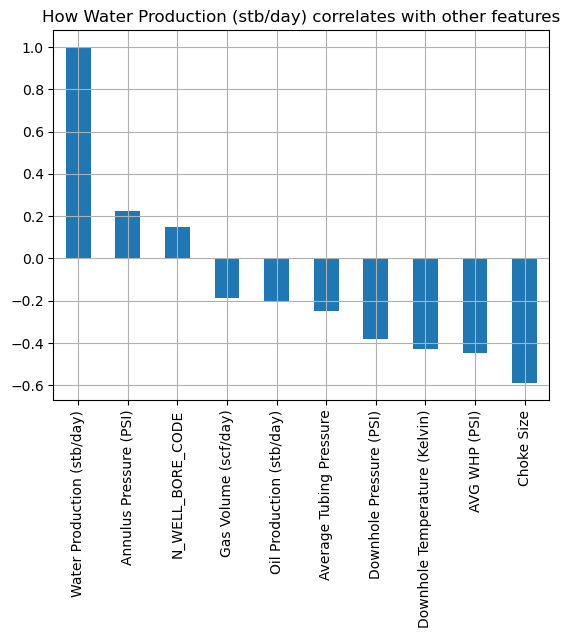

In [25]:
corr['Water Production (stb/day)'].sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title("How Water Production (stb/day) correlates with other features")
plt.show()

#### Distribution of Oil, Gas and Water Production by Well Type

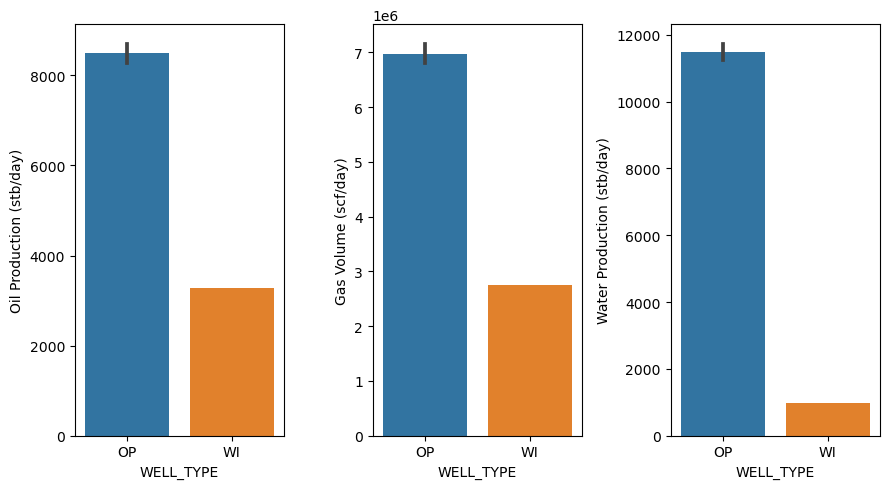

In [26]:
fig,ax = plt.subplots(1,3, figsize=(9,5))
sns.barplot(x=data['WELL_TYPE'],y=data['Oil Production (stb/day)'],ax=ax[0])
sns.barplot(x=data['WELL_TYPE'],y=data['Gas Volume (scf/day)'],ax=ax[1])
sns.barplot(x=data['WELL_TYPE'],y=data['Water Production (stb/day)'],ax=ax[2])
plt.tight_layout()

- From the above plots:
* Water injection wells produced small amount of oil, gas and water as compare to the oil production wells.

# Feature Engineering

In [27]:
## Drop the missing values in the Choke size column since its insignificant 

data['Choke Size'] = data['Choke Size'].replace(np.nan,0)

In [28]:
data.isna().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

In [29]:
# change categorical to numerical
df1 = data.copy()

df1['WELL_TYPE'] = df1['WELL_TYPE'].astype('category').cat.codes


In [30]:
## remove outliers
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtypes !='object':
            q1,q3 = df[col].quantile([0.25,0.75])
            iqr = q3-q1
            lower = q1-1.5*iqr
            upper = q3+1.5*iqr
            df[col] = np.where(df[col]<lower,lower,df[col])
            df[col] = np.where(df[col]>upper,upper,df[col])
    return df

In [31]:
df = remove_outliers(df1)

In [32]:
# Extract year, month and day from the Production date
df1['PRODUCTION DATE'] = pd.to_datetime(df1['PRODUCTION DATE'],format='mixed')
df1['year'] = df1['PRODUCTION DATE'].dt.year
df1['month'] = df1['PRODUCTION DATE'].dt.month
df1['day'] = df1['PRODUCTION DATE'].dt.day

# Split the data

In [33]:
X = df1.drop(['Oil Production (stb/day)','Gas Volume (scf/day)',
              'Water Production (stb/day)','FLOW_KIND','WellBore Name','WELL_BORE_CODE','Field Name',
              'PRODUCTION DATE'], axis=1) # input features

Y = df1[['Oil Production (stb/day)','Gas Volume (scf/day)','Water Production (stb/day)']]

In [34]:
# print the X and Y shape
X.shape, Y.shape

((6925, 11), (6925, 3))

In [35]:
X.head()

,N_WELL_BORE_CODE,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,year,month,day
0,105.5,0.0,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,2014,7,4
1,105.5,0.0,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,2014,8,4
2,105.5,0.0,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,2014,9,4
3,105.5,0.0,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,2014,10,4
4,105.5,0.0,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,2014,11,4


In [36]:
Y.sample(5)

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
2546,6586.1332,5.590771e+06,24858.3316
4441,17384.6794,1.367564e+07,10037.7078
4162,26796.2806,2.218090e+07,981.0513
5829,701.6495,6.396222e+05,5467.5196
1029,5445.5675,4.698174e+06,2949.7584


## Normalize the data

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

x_scaler = MinMaxScaler(feature_range=(0,1)) # 
y_scaler = MinMaxScaler(feature_range=(0,1))

X_scaled = x_scaler.fit_transform(X)
Y_scaled = y_scaler.fit_transform(Y)


In [38]:
Y_scaled

array([[0.        , 0.        , 0.05400598],
       [0.        , 0.        , 0.05400598],
       [0.        , 0.        , 0.05400598],
       ...,
       [0.02948025, 0.02870681, 0.05524218],
       [0.02947321, 0.02821485, 0.05519382],
       [0.02996615, 0.02845587, 0.05516669]])

## Train Test split

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_scaled, test_size=0.2, random_state=42)

# Modelling

### Test and Evaluation of model

In [40]:
# model evaluation function

def evaluate_model(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    mse = print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    rmse= print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    r2score =r2_score(y_test,y_pred)
    print("R2 Score: ",r2score)
    y_test = y_scaler.inverse_transform(y_test)
    y_pred = y_scaler.inverse_transform(y_pred)
    
    # plot the actual vs predicted values
    
    print('='*45)
    
    return 
    

In [41]:
# list of models
rf =RandomForestRegressor(n_estimators=1000,criterion='squared_error',max_features='sqrt',max_depth=200)
model = [rf]
for i in model:
    print('Model name: ',i)
    evaluate_model(i, x_train,y_train,x_test,y_test)

Model name:  RandomForestRegressor(max_depth=200, max_features='sqrt', n_estimators=1000)
Mean Absolute Error: 0.0220217751103767
Mean Squared Error:  0.0034247510137443023
Root Mean Squared Error:  0.05852137228179379
R2 Score:  0.9570807239736996


## Training of model and testing

In [42]:
rfr =RandomForestRegressor(n_estimators=1000,max_features='sqrt',max_depth=200)
rfr.fit(x_train,y_train)
yp_rfr = rfr.predict(x_test)
rfr.score(x_test,y_test)
print(r2_score(y_test,yp_rfr))

0.9571233874731413


##### Reverse the normalization of the data

In [43]:
y_test = y_scaler.inverse_transform(y_test)
y_pred = y_scaler.inverse_transform(yp_rfr)

In [44]:
y_test_dataframe = pd.DataFrame(y_test, columns=['Oil Production (stb/day)','Gas Volume (scf/day)','Water Production (stb/day)'])
y_test_dataframe

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,5607.4092,4.637945e+06,0.0000
1,0.0000,0.000000e+00,0.0000
2,853.4272,8.039413e+05,18386.4877
3,26796.2806,2.257914e+07,80.1975
4,26796.2806,2.257914e+07,8809.8998
...,...,...,...
1380,2090.7331,1.905770e+06,20901.7329
1381,10640.2898,9.313473e+06,25369.7715
1382,2609.3436,2.192565e+06,18602.1718
1383,17448.7745,1.407792e+07,1688.4876


In [45]:
y_pred_dataframe = pd.DataFrame(y_pred, columns=['Oil Production (stb/day)','Gas Volume (scf/day)','Water Production (stb/day)'])
y_pred_dataframe

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,254.955086,2.250428e+05,1.587445e+01
1,0.000000,0.000000e+00,-7.215184e-11
2,1622.739928,1.406654e+06,2.838822e+04
3,26649.280155,2.243342e+07,2.121708e+02
4,25926.216036,2.162088e+07,9.605015e+03
...,...,...,...
1380,2272.405849,1.988720e+06,2.123623e+04
1381,10147.519060,8.858193e+06,2.452510e+04
1382,2694.402704,2.254215e+06,2.055529e+04
1383,18553.992916,1.482645e+07,1.652986e+03


## Save the model

In [46]:
import joblib

# save Scaler
joblib.dump(x_scaler,'OilPrediction_X_Scaler.pkl')
joblib.dump(y_scaler,'OilPrediction_Y_Scaler.pkl')
joblib.dump(rfr,'OilProdPrediction_model.pkl')

['OilProdPrediction_model.pkl']

# Prediction of Oil, Gas and Water Production

## Load the validation dataset to evaluate the model

In [47]:
val_data = pd.read_csv('dseats_2024_validation_dataset.csv')

In [48]:
val_data.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN


In [49]:
# check the shape of the validation dataset
val_data.shape

(9920, 16)

In [50]:
# check missing values
val_data.isna().sum()

PRODUCTION DATE                  7845
Field Name                       7845
WELL_BORE_CODE                   7845
N_WELL_BORE_CODE                 7845
WellBore Name                    7845
FLOW_KIND                        7845
WELL_TYPE                        7845
Downhole Pressure (PSI)          7845
Downhole Temperature (Kelvin)    7845
Average Tubing Pressure          7845
Annulus Pressure (PSI)           7845
AVG WHP (PSI)                    7845
Choke Size                       7845
Oil Production (stb/day)         9920
Gas Volume (scf/day)             9920
Water Production (stb/day)       9920
dtype: int64

In [51]:
# Extract the actual shape 
val_data = val_data[:2075]
val_data.isna().sum()

PRODUCTION DATE                     0
Field Name                          0
WELL_BORE_CODE                      0
N_WELL_BORE_CODE                    0
WellBore Name                       0
FLOW_KIND                           0
WELL_TYPE                           0
Downhole Pressure (PSI)             0
Downhole Temperature (Kelvin)       0
Average Tubing Pressure             0
Annulus Pressure (PSI)              0
AVG WHP (PSI)                       0
Choke Size                          0
Oil Production (stb/day)         2075
Gas Volume (scf/day)             2075
Water Production (stb/day)       2075
dtype: int64

The above shows that our target columns thus, Oil Production (stb/day), Gas Volume (scf/day) and Water Production (stb/day) are having no values. The model has to predict the values

### Preprocess and select input features for prediction

In [52]:
# change Well Type data type to numerical
val_data['WELL_TYPE'] = val_data['WELL_TYPE'].astype('category').cat.codes

# Extract year, month and day from the Production date column
val_data['PRODUCTION DATE'] = pd.to_datetime(val_data['PRODUCTION DATE'],format='mixed')
val_data['year'] = val_data['PRODUCTION DATE'].dt.year
val_data['month'] = val_data['PRODUCTION DATE'].dt.month
val_data['day'] = val_data['PRODUCTION DATE'].dt.day



## Select Input features

In [54]:
input_features = val_data.drop(['Oil Production (stb/day)','Gas Volume (scf/day)',
              'Water Production (stb/day)','FLOW_KIND','WellBore Name','WELL_BORE_CODE','Field Name',
              'PRODUCTION DATE'], axis=1) # input features

In [56]:
# display sample of input features
input_features.sample(5)

,N_WELL_BORE_CODE,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,year,month,day
524,106.0,0,3364.224336,378.895320,2921.385331,291.951277,442.839005,3.208781,2016,2,14
1,105.0,0,3247.951135,376.759980,2547.453670,0.000000,700.497465,21.775180,2015,7,2
1392,108.0,0,3861.270271,372.716146,3452.150808,209.068615,409.119463,1.698061,2016,1,23
1484,108.0,0,3882.631843,372.770563,3458.718628,319.960142,423.913215,3.423226,2016,4,24
1002,107.0,0,0.000000,273.150000,382.271052,314.612611,382.271052,0.465207,2016,3,18


## Normalize the input features

In [57]:
# use x_scaler to normalize

input_features_scaled = x_scaler.fit_transform(input_features)

## Use the model to predict Oil, Gas and Water production

In [58]:
## using the model to predict
model = rfr # model

predicted_values = model.predict(input_features_scaled)

In [59]:
predicted_values

array([[0.36387357, 0.35896311, 0.12817911],
       [0.31454831, 0.30996621, 0.17912414],
       [0.40125812, 0.39146096, 0.14875339],
       ...,
       [0.00575461, 0.00575637, 0.06600167],
       [0.00587356, 0.00588044, 0.06620413],
       [0.00580135, 0.00581597, 0.06617894]])

In [60]:
# Use y_scaler to reverse the scaling

production_forecast = y_scaler.inverse_transform(predicted_values)

# create dataframe for the production_forecast

oil_gas_water_prod = pd.DataFrame(production_forecast, columns=['Predicted Oil Production (stb/day)','Predicted Gas Volume (scf/day)','Predicted Water Production (stb/day)'])

In [61]:
oil_gas_water_prod

,Predicted Oil Production (stb/day),Predicted Gas Volume (scf/day),Predicted Water Production (stb/day)
0,9750.458281,8.105079e+06,3955.206723
1,8428.724856,6.998771e+06,6671.798345
2,10752.225256,8.838853e+06,5052.308837
3,11607.196462,9.459450e+06,2744.975751
4,12746.449251,1.029788e+07,2138.425830
...,...,...,...
2070,156.558603,1.317520e+05,639.341074
2071,152.485073,1.285545e+05,616.167331
2072,154.202243,1.299738e+05,639.657902
2073,157.389638,1.327752e+05,650.454058


## Concatenate predicted production dataframe to the validation data

In [62]:
# load validation dataset again
vald = pd.read_csv('dseats_2024_validation_dataset.csv')

In [63]:
# Remove the oil gas and water production columns in the validation dataset
vald = vald.iloc[:,:-3]

In [64]:
# concatenate the predicted oil gas and water production dataframe to the validation data
NewData = pd.concat([vald,oil_gas_water_prod],axis=1)
# extract up to 2075 rows
new_data = NewData[:2075]

In [65]:
new_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Predicted Oil Production (stb/day),Predicted Gas Volume (scf/day),Predicted Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,9750.458281,8.105079e+06,3955.206723
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,8428.724856,6.998771e+06,6671.798345
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,10752.225256,8.838853e+06,5052.308837
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,11607.196462,9.459450e+06,2744.975751
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,12746.449251,1.029788e+07,2138.425830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,156.558603,1.317520e+05,639.341074
2071,2016-09-13 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,152.485073,1.285545e+05,616.167331
2072,2016-09-14 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,154.202243,1.299738e+05,639.657902
2073,2016-09-15 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,157.389638,1.327752e+05,650.454058


In [66]:
# Extract year, month and day from the Production date column
new_data['PRODUCTION DATE'] = pd.to_datetime(new_data['PRODUCTION DATE'],format='mixed')
new_data['year'] = new_data['PRODUCTION DATE'].dt.year
new_data['month'] = new_data['PRODUCTION DATE'].dt.month

In [81]:
# visualize the predicted production
plt.rcParams['figure.dpi'] = 600
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(3,1, sharex=True, figsize=(20,15))
sns.barplot(x='month', y=new_data['Predicted Oil Production (stb/day)'],data=new_data,ax=ax[0],hue=new_data['year'],)
sns.barplot(x='month', y=new_data['Predicted Gas Volume (scf/day)'],data=new_data,ax=ax[1],hue=new_data['year'])
sns.barplot(x='month', y=new_data['Predicted Water Production (stb/day)'],data=new_data,ax=ax[2],hue=new_data['year'])
plt.tight_layout()
plt.show()

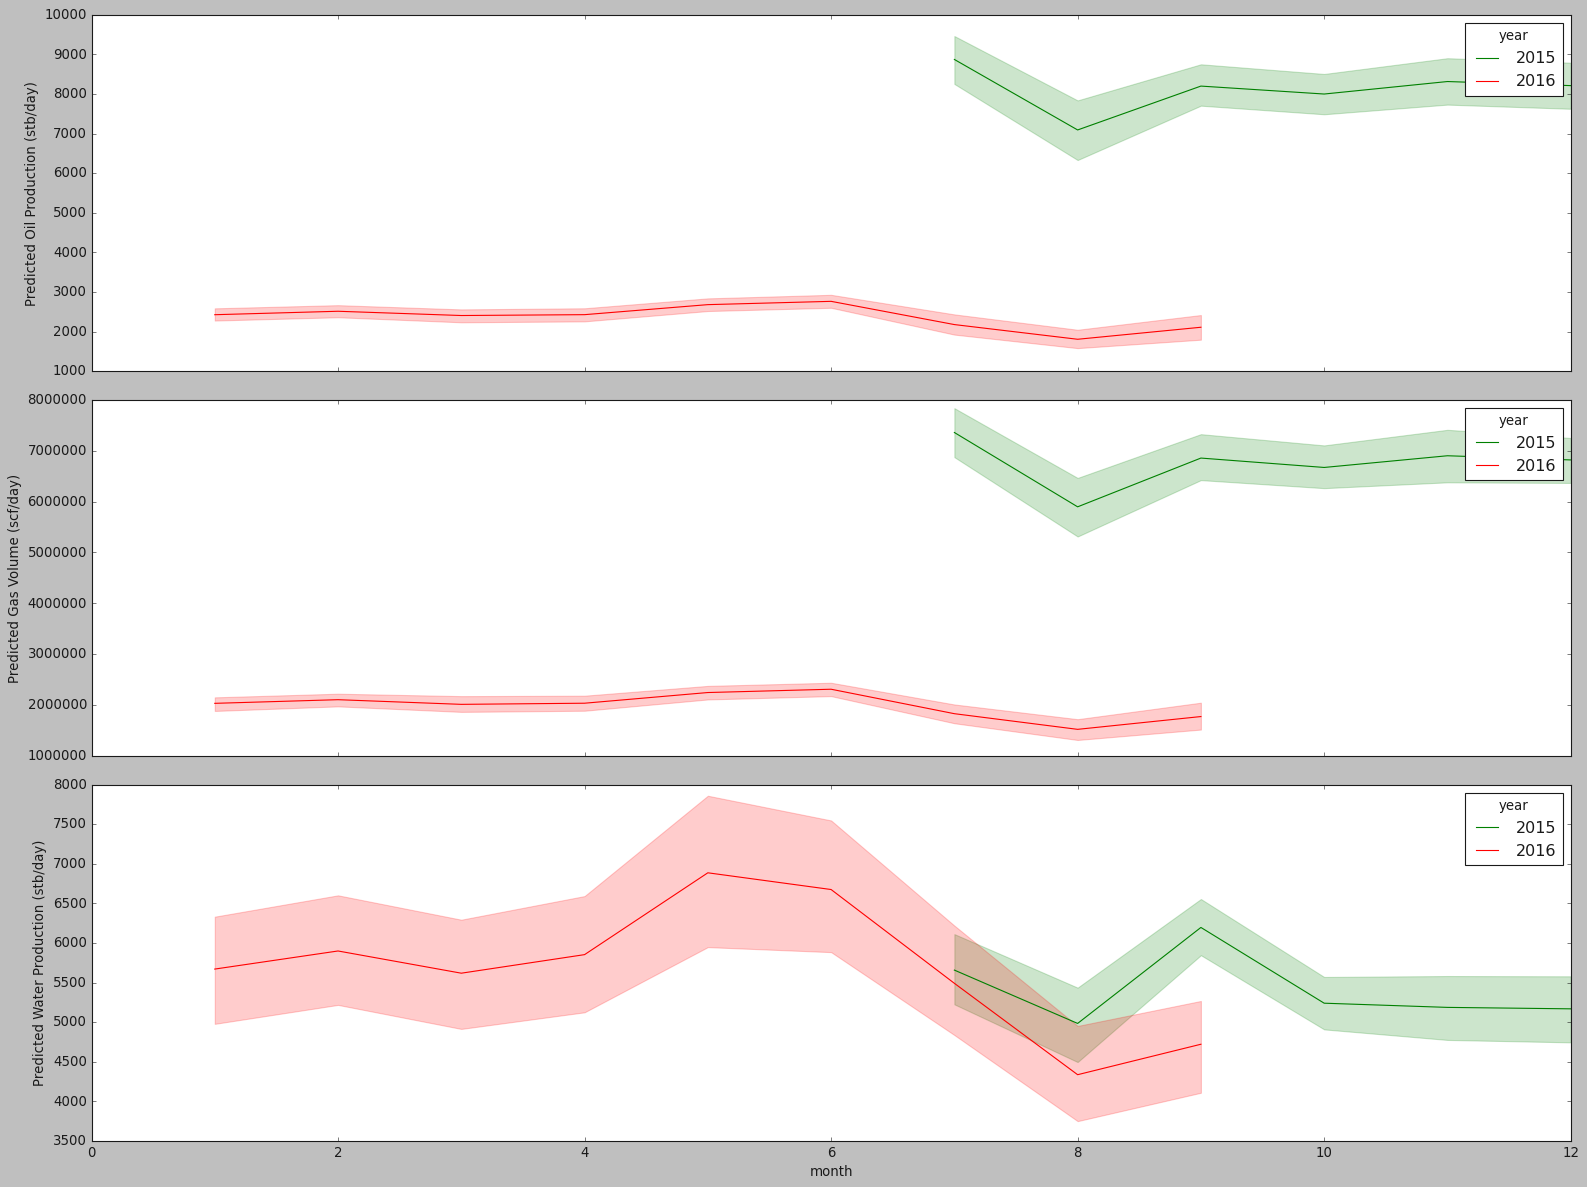

In [91]:
# visualize the predicted production
plt.rcParams['figure.dpi'] = 600
plt.style.use("classic")
palette= ['green','red']

fig, ax = plt.subplots(3,1, sharex=True, figsize=(20,15))
sns.lineplot(x='month', y=new_data['Predicted Oil Production (stb/day)'],data=new_data,ax=ax[0],hue=new_data['year'],palette=palette,)
sns.lineplot(x='month', y=new_data['Predicted Gas Volume (scf/day)'],data=new_data,ax=ax[1],hue=new_data['year'],palette=palette)
sns.lineplot(x='month', y=new_data['Predicted Water Production (stb/day)'],data=new_data,ax=ax[2],hue=new_data['year'],palette=palette)
plt.tight_layout()
plt.show()

In [107]:
new_data.to_csv("Oil_Gas_water_production_forecast.csv")